# Elliptical harmonic oscillator with interacting gaussians

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tqdm

from vmc.interface import PyEllipticalHarmonicOscillator, PyMetropolisAlgorithm, \
    PyInteractingEllipticalGaussian, PySampler
from vmc import run_experiment

from IPython.core.pylabtools import figsize
from IPython.core.display import display

In [2]:
sns.set(color_codes=True)

In [3]:
mass = 1.0
omega = 1.0
hbar = 1.0

radius = 0.043
beta = _lambda = 2.82843

num_particles = 5
num_dimensions = 3

step_length = 1.0
num_thermalization_steps = int(num_particles * 2000)
num_samples = int(1e6)

alpha_min = 0.2
alpha_max = 0.9
num_alphas = 29

parameter_names = ["alpha"]

alphas = np.linspace(alpha_min, alpha_max, num_alphas).reshape(num_alphas, 1)

kwargs = {
    "num_samples": num_samples, "step_length": step_length,
    "num_thermalization_steps": num_thermalization_steps}

In [4]:
wavefunction = PyInteractingEllipticalGaussian(
    num_particles, num_dimensions, mass, omega, beta, radius, spread=step_length)
solver = PyMetropolisAlgorithm(num_particles)
hamiltonian = PyEllipticalHarmonicOscillator(_lambda)

sampler = PySampler(wavefunction, hamiltonian, solver)

In [5]:
df = run_experiment(sampler, wavefunction, alphas, parameter_names, **kwargs)

100%|██████████| 29/29 [00:31<00:00,  1.07s/it]


In [6]:
display(df)

,alpha,energy,variance,acceptance
0,0.200,17.991245,28.162925,0.600890
1,0.225,16.584926,19.774514,0.580131
2,0.250,15.575167,14.229959,0.560714
3,0.275,14.792888,10.061798,0.542327
4,0.300,14.173859,7.120005,0.525044
5,0.325,13.689833,4.928256,0.510234
6,0.350,13.358575,3.315452,0.495857
7,0.375,13.077777,2.093570,0.481139
8,0.400,12.889304,1.227582,0.468593
9,0.425,12.756357,0.646481,0.455142


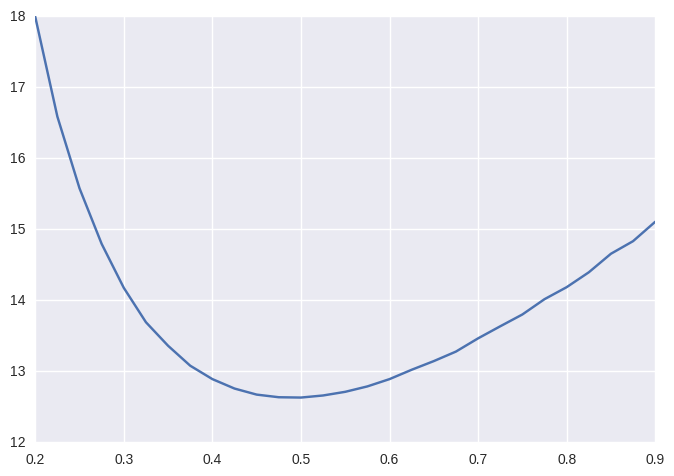

In [7]:
plt.plot(df["alpha"], df["energy"])
plt.show()

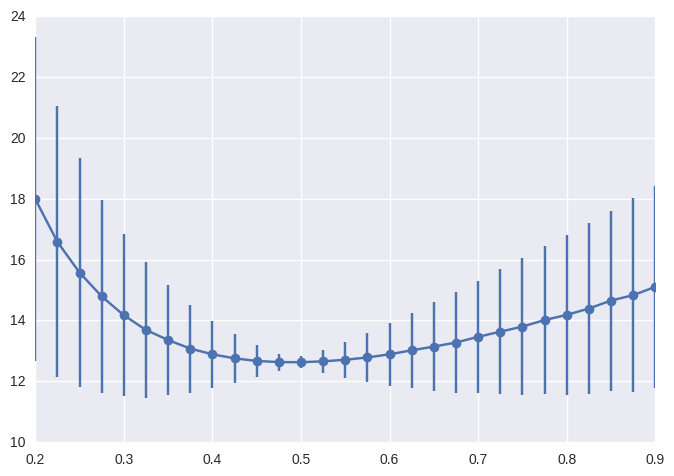

In [8]:
plt.errorbar(
    df["alpha"], df["energy"],
    yerr=np.sqrt(df["variance"]),
    label="analytical", fmt="o-")
plt.show()

In [9]:
r_min = 0
r_max = 4
num_bins = 100

sampler.initialize_one_body_densities(r_min, r_max, num_bins)
wavefunction.set_parameters(np.array([0.5]))
wavefunction.redistribute()

In [10]:
sampler.sample(num_samples, step_length)

In [11]:
bins = sampler.get_one_body_densities()
radius = np.linspace(r_min, r_max, num_bins)

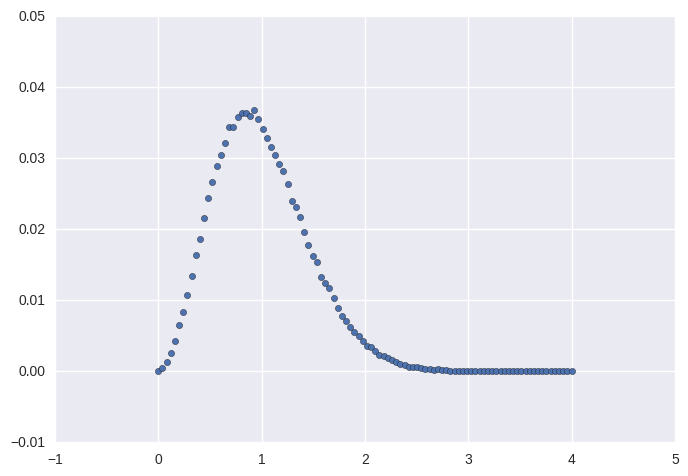

In [12]:
plt.scatter(radius, bins)
plt.show()